# 数据描述性统计
描述性统计就是描述我们搜集到的数据，如变量的取值分布、集中趋势、离散程度以前变量之间的关系等，为后续数据建模打下基础

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# 联系，官员、关系人记录数量

In [2]:
# 读取数据赋值relationship
relationship = pd.read_csv('./officer_relationship_song.csv')
relationship.head()

,Name,姓名,Index year,Sex,Associate,社会关系人姓名,Assoc. Index Year,Assoc. Sex,Association,联系,...,亲属关系,Kin Name,亲戚姓名,Assoc. Kinship Rel.,关系人的亲属关系,Assoc. Kin Name,关系人的亲戚姓名,Distance 距离,Person ID,Assoc ID
0,An Dun,安惇,1042,M,Zou Hao,邹浩,1060.0,M,Opposed or attacked,反对/攻讦,...,未详,Wei Xiang,未详,U,未详,Wei Xiang,未详,1275.341259,1,3888
1,An Dun,安惇,1042,M,Zhang Shiliang,张士良,NaN,M,Opposed or attacked,反对/攻讦,...,未详,Wei Xiang,未详,U,未详,Wei Xiang,未详,NaN,1,25065
2,Chen Jian(2),陈戬,1081,M,Tong Guan,童贯,1054.0,M,Opposed or attacked,反对/攻讦,...,未详,Wei Xiang,未详,U,未详,Wei Xiang,未详,910.189663,31,8124
3,Cheng Yu,程瑀,1087,M,Wu Min,吴敏,1087.0,M,Opposed or attacked,反对/攻讦,...,未详,Wei Xiang,未详,U,未详,Wei Xiang,未详,370.461638,128,8163
4,Zhang Shangying,张商英,1043,M,Sima Guang,司马光,1019.0,M,Opposed or attacked,反对/攻讦,...,未详,Wei Xiang,未详,U,未详,Wei Xiang,未详,868.170971,272,1488


In [3]:
# 读取亲戚数据赋值kinship 
kindship = pd.read_csv('./officer_kinship_song.csv')
kindship.head()

,Name,姓名,Kin Name,亲戚姓名,Kinship
0,An Dun,安惇,An Fang,安邡,S
1,An Dun,安惇,An Fang,安邡,S
2,An Dun,安惇,An Fang,安邡,S
3,An Dun,安惇,An Fang,安邡,S
4,An Dun,安惇,An Fang,安邡,S


In [4]:
# 查询relationship的每列标题
relationship.columns

Index(['Name', '姓名', 'Index year', 'Sex', 'Associate', '社会关系人姓名',
       'Assoc. Index Year', 'Assoc. Sex', 'Association', '联系', 'Address', '籍贯',
       'X', 'Y', 'Assoc. Address', '联系人籍贯', 'Assoc. X', 'Assoc. Y',
       'Kinship Relation', '亲属关系', 'Kin Name', '亲戚姓名', 'Assoc. Kinship Rel.',
       '关系人的亲属关系', 'Assoc. Kin Name', '关系人的亲戚姓名', 'Distance 距离', 'Person ID',
       'Assoc ID'],
      dtype='object')

In [5]:
# 以groupby('联系')进行分组，剩下的.agg({'姓名&社会关系人姓名':'nunique'})
relationship[['联系','姓名','社会关系人姓名']].groupby('联系').nunique()

,姓名,社会关系人姓名
联系,,
不合,35,49
反对/攻讦,58,56
得到Y的支持,55,97
支持,51,49
政见趋同,21,23
遭到Y的反对/攻讦,52,111


In [6]:
# 联系，官员，关系人
relationship[['联系','姓名','社会关系人姓名']].groupby('联系').agg({'姓名':'nunique','社会关系人姓名':'nunique'})

,姓名,社会关系人姓名
联系,,
不合,35,49
反对/攻讦,58,56
得到Y的支持,55,97
支持,51,49
政见趋同,21,23
遭到Y的反对/攻讦,52,111


In [7]:
# 查看不去重的数据,以groupby('联系')进行分组,剩下的.agg({'姓名&社会关系人姓名':'count'})
relationship[['联系','姓名','社会关系人姓名']].groupby('联系').count()

,姓名,社会关系人姓名
联系,,
不合,61,61
反对/攻讦,78,78
得到Y的支持,132,132
支持,80,80
政见趋同,25,25
遭到Y的反对/攻讦,130,130


In [8]:
relationshipnew = relationship[['联系','姓名','社会关系人姓名']].groupby('联系').agg({'姓名':'nunique','社会关系人姓名':'nunique'})
relationshipnew

,姓名,社会关系人姓名
联系,,
不合,35,49
反对/攻讦,58,56
得到Y的支持,55,97
支持,51,49
政见趋同,21,23
遭到Y的反对/攻讦,52,111


In [9]:
relationshipnew['记录'] = relationship[['联系','姓名','社会关系人姓名']].groupby('联系').agg({'姓名':'count'})
relationshipnew

,姓名,社会关系人姓名,记录
联系,,,
不合,35,49,61
反对/攻讦,58,56,78
得到Y的支持,55,97,132
支持,51,49,80
政见趋同,21,23,25
遭到Y的反对/攻讦,52,111,130


# 联系，距离

In [10]:
relationship.columns

Index(['Name', '姓名', 'Index year', 'Sex', 'Associate', '社会关系人姓名',
       'Assoc. Index Year', 'Assoc. Sex', 'Association', '联系', 'Address', '籍贯',
       'X', 'Y', 'Assoc. Address', '联系人籍贯', 'Assoc. X', 'Assoc. Y',
       'Kinship Relation', '亲属关系', 'Kin Name', '亲戚姓名', 'Assoc. Kinship Rel.',
       '关系人的亲属关系', 'Assoc. Kin Name', '关系人的亲戚姓名', 'Distance 距离', 'Person ID',
       'Assoc ID'],
      dtype='object')

In [11]:
data1 = relationship[['联系','Distance 距离']].groupby('联系').agg({'Distance 距离':'mean'}).sort_values(by = 'Distance 距离',ascending = False)
data1

,Distance 距离
联系,
支持,703.809609
得到Y的支持,699.818200
遭到Y的反对/攻讦,689.981035
反对/攻讦,664.581145
不合,566.486530
政见趋同,553.851090


# 降维及筛选支持型关系和对搞型关系

<BarContainer object of 6 artists>

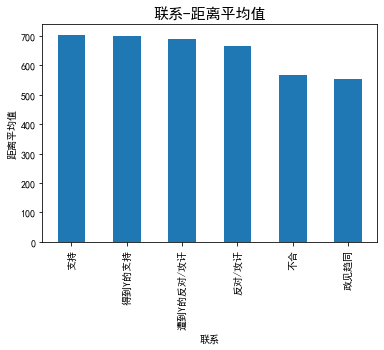

In [12]:
# 柱形图
plt.rcParams["font.sans-serif"] = ["SimHei"]
# plt.figure(figsize = (20,8))
x = data1.index
y = data1['Distance 距离']
plt.title('联系-距离平均值',fontsize = 15)
plt.xlabel('联系',fontsize = 10)
plt.ylabel('距离平均值',fontsize = 10)
plt.xticks(rotation = 90,fontsize = 10)
plt.bar(x,y,width = 0.5)

<BarContainer object of 6 artists>

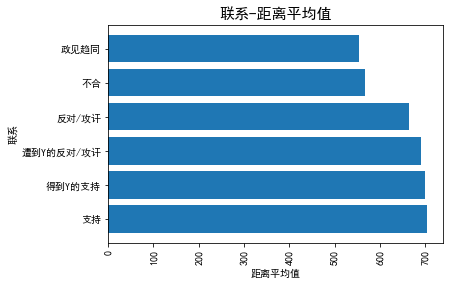

In [13]:
# 条形图
plt.rcParams["font.sans-serif"] = ["SimHei"]
# plt.figure(figsize = (20,8))
x = data1.index
y = data1['Distance 距离']
plt.title('联系-距离平均值',fontsize = 15)
plt.xlabel('距离平均值',fontsize = 10)
plt.ylabel('联系',fontsize = 10)
plt.xticks(rotation = 90,fontsize = 10)
plt.barh(x,y)

In [14]:
# 降维：现在从图上观看是从6个维度去看联系和距离之间的关系，现在降维让其变成仅是支持和不是支持之间的两个维度

In [15]:
# 需要得到是所有支持的平均值和所有不支持的平均值

In [16]:
# 这种方式得到不同支持方式的平均值和 不同不支持方式的平均值 ，之后还需要再求多个平均值
relationship[['联系','Distance 距离']].query("联系 == '支持' or 联系 == '得到Y的支持' or 联系 == '政见趋同'").groupby('联系').agg({'Distance 距离':'mean'})

,Distance 距离
联系,
得到Y的支持,699.818200
支持,703.809609
政见趋同,553.851090


In [17]:
# 这种方式直接得到所有支持者的'Distance 距离'平均值
relationship[['联系','Distance 距离']].query("联系 == '支持' or 联系 == '得到Y的支持' or 联系 == '政见趋同'")['Distance 距离'].mean()

685.6485615160855

In [18]:
relationship[['联系','Distance 距离']].query("联系 == '遭到Y的反对/攻讦' or 联系 == '反对/攻讦' or 联系 == '不合'")['Distance 距离'].mean()

654.5744813763426

# 不同联系人年龄均值对比分析

In [19]:
relationship.columns

Index(['Name', '姓名', 'Index year', 'Sex', 'Associate', '社会关系人姓名',
       'Assoc. Index Year', 'Assoc. Sex', 'Association', '联系', 'Address', '籍贯',
       'X', 'Y', 'Assoc. Address', '联系人籍贯', 'Assoc. X', 'Assoc. Y',
       'Kinship Relation', '亲属关系', 'Kin Name', '亲戚姓名', 'Assoc. Kinship Rel.',
       '关系人的亲属关系', 'Assoc. Kin Name', '关系人的亲戚姓名', 'Distance 距离', 'Person ID',
       'Assoc ID'],
      dtype='object')

In [20]:
relationship[['Index year', 'Assoc. Index Year']]

,Index year,Assoc. Index Year
0,1042,1060.0
1,1042,NaN
2,1081,1054.0
3,1087,1087.0
4,1043,1019.0
...,...,...
501,1000,1007.0
502,1000,1001.0
503,986,980.0
504,1069,1061.0


In [21]:
# abs()表示绝对值

In [22]:
abs(relationship['Index year'] - relationship['Assoc. Index Year']) # 得到年龄差 

0      18.0
1       NaN
2      27.0
3       0.0
4      24.0
       ... 
501     7.0
502     1.0
503     6.0
504     8.0
505    18.0
Length: 506, dtype: float64

In [23]:
relationship['年龄差'] = abs(relationship['Index year'] - relationship['Assoc. Index Year'])
relationship

,Name,姓名,Index year,Sex,Associate,社会关系人姓名,Assoc. Index Year,Assoc. Sex,Association,联系,...,Kin Name,亲戚姓名,Assoc. Kinship Rel.,关系人的亲属关系,Assoc. Kin Name,关系人的亲戚姓名,Distance 距离,Person ID,Assoc ID,年龄差
0,An Dun,安惇,1042,M,Zou Hao,邹浩,1060.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,1275.341259,1,3888,18.0
1,An Dun,安惇,1042,M,Zhang Shiliang,张士良,NaN,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,NaN,1,25065,NaN
2,Chen Jian(2),陈戬,1081,M,Tong Guan,童贯,1054.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,910.189663,31,8124,27.0
3,Cheng Yu,程瑀,1087,M,Wu Min,吴敏,1087.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,370.461638,128,8163,0.0
4,Zhang Shangying,张商英,1043,M,Sima Guang,司马光,1019.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,868.170971,272,1488,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Yu Jing,余靖,1000,M,Ouyang Xiu,欧阳修,1007.0,M,Agreed with views of,政见趋同,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,1066.098438,12319,1384,7.0
502,Yu Jing,余靖,1000,M,Yin Zhu,尹洙,1001.0,M,Agreed with views of,政见趋同,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,1102.124909,12319,7104,1.0
503,Kong Daofu,孔道辅,986,M,Yang Xie,杨偕,980.0,M,Agreed with views of,政见趋同,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,431.228735,15939,2003,6.0
504,Liu Anshang,刘安上,1069,M,Shi Gongbi,石公弼,1061.0,M,Agreed with views of,政见趋同,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,165.947261,17479,13417,8.0


In [24]:
relationship.info()
# 从表中可以看出Assoc. Index Year    445 non-null  ， Index year           506 non-null ，关系人去世年有部分是空的，那就删除掉

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 506 non-null    object 
 1   姓名                   506 non-null    object 
 2   Index year           506 non-null    int64  
 3   Sex                  506 non-null    object 
 4   Associate            506 non-null    object 
 5   社会关系人姓名              506 non-null    object 
 6   Assoc. Index Year    445 non-null    float64
 7   Assoc. Sex           506 non-null    object 
 8   Association          506 non-null    object 
 9   联系                   506 non-null    object 
 10  Address              506 non-null    object 
 11  籍贯                   506 non-null    object 
 12  X                    506 non-null    float64
 13  Y                    506 non-null    float64
 14  Assoc. Address       506 non-null    object 
 15  联系人籍贯                506 non-null    obj

In [25]:
# 'Assoc. Index 使用英文波良号'~'是因为中间有空格,sql或者mysql需要这样
# relationshipnew = relationship.query("~Assoc. Index Year~>0") 
relationshipnew = relationship[relationship['Assoc. Index Year']>0]
relationshipnew

,Name,姓名,Index year,Sex,Associate,社会关系人姓名,Assoc. Index Year,Assoc. Sex,Association,联系,...,Kin Name,亲戚姓名,Assoc. Kinship Rel.,关系人的亲属关系,Assoc. Kin Name,关系人的亲戚姓名,Distance 距离,Person ID,Assoc ID,年龄差
0,An Dun,安惇,1042,M,Zou Hao,邹浩,1060.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,1275.341259,1,3888,18.0
2,Chen Jian(2),陈戬,1081,M,Tong Guan,童贯,1054.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,910.189663,31,8124,27.0
3,Cheng Yu,程瑀,1087,M,Wu Min,吴敏,1087.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,370.461638,128,8163,0.0
4,Zhang Shangying,张商英,1043,M,Sima Guang,司马光,1019.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,868.170971,272,1488,24.0
5,Zhang Dun,章惇,1035,M,Zheng Yong,郑雍,1031.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,795.028298,333,8030,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Yu Jing,余靖,1000,M,Ouyang Xiu,欧阳修,1007.0,M,Agreed with views of,政见趋同,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,1066.098438,12319,1384,7.0
502,Yu Jing,余靖,1000,M,Yin Zhu,尹洙,1001.0,M,Agreed with views of,政见趋同,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,1102.124909,12319,7104,1.0
503,Kong Daofu,孔道辅,986,M,Yang Xie,杨偕,980.0,M,Agreed with views of,政见趋同,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,431.228735,15939,2003,6.0
504,Liu Anshang,刘安上,1069,M,Shi Gongbi,石公弼,1061.0,M,Agreed with views of,政见趋同,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,165.947261,17479,13417,8.0


In [26]:
data2 = relationshipnew[['联系','年龄差']].groupby('联系').agg({'年龄差':'mean'})
data2

,年龄差
联系,
不合,10.758621
反对/攻讦,21.513889
得到Y的支持,17.614679
支持,13.373333
政见趋同,16.708333
遭到Y的反对/攻讦,20.242991


<AxesSubplot:xlabel='联系'>

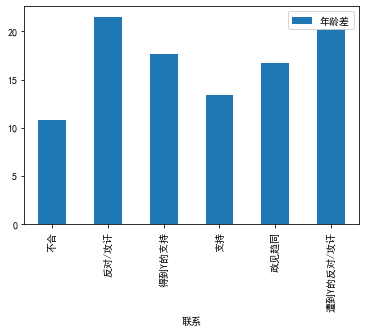

In [27]:
# 简洁做法
relationshipnew[['联系','年龄差']].groupby('联系').agg({'年龄差':'mean'}).plot(kind = 'bar')

<BarContainer object of 6 artists>

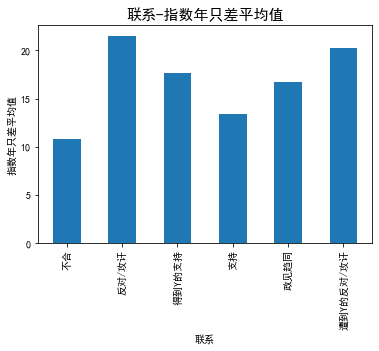

In [28]:
# 柱形图
plt.rcParams["font.sans-serif"] = ["SimHei"]
# plt.figure(figsize = (20,8))
x = data2.index
y = data2['年龄差']
plt.title('联系-指数年只差平均值',fontsize = 15)
plt.xlabel('联系',fontsize = 10)
plt.ylabel('指数年只差平均值',fontsize = 10)
plt.xticks(rotation = 90,fontsize = 10)
plt.bar(x,y,width = 0.5)